# 🌍 Tourism Experience Analytics
## Complete ML Pipeline: Regression | Classification | Recommendation
### Steps: Data Cleaning → EDA → Feature Engineering → Modeling → Evaluation → Pickle Export

## 1. Import Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (10, 6)

# ML
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score
)
from sklearn.metrics.pairwise import cosine_similarity
try:
    from xgboost import XGBRegressor, XGBClassifier
    XGB_AVAILABLE = True
except ImportError:
    XGB_AVAILABLE = False
    print('XGBoost not available, skipping')

try:
    from lightgbm import LGBMRegressor, LGBMClassifier
    LGBM_AVAILABLE = True
except ImportError:
    LGBM_AVAILABLE = False
    print('LightGBM not available, skipping')

print('✅ All libraries imported successfully')

✅ All libraries imported successfully


## 2. Create Output Directory

In [47]:
OUTPUT_DIR = r'C:\Users\rohit\Desktop\labmentix'
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, 'plots'), exist_ok=True)
print(f'✅ Output directory: {OUTPUT_DIR}/')

✅ Output directory: C:\Users\rohit\Desktop\labmentix/


## 3. Load All Datasets

In [48]:
transaction     = pd.read_excel('Transaction.xlsx')
mode            = pd.read_excel('Mode.xlsx')
city            = pd.read_excel('City.xlsx')
item            = pd.read_excel('Item.xlsx')
region          = pd.read_excel('Region.xlsx')
country         = pd.read_excel('Country.xlsx')
continent       = pd.read_excel('Continent.xlsx')
user            = pd.read_excel('User.xlsx')
attraction_type = pd.read_excel('Type.xlsx')

print('✅ All datasets loaded!')
for name, df_ in [('Transaction', transaction), ('Mode', mode), ('City', city),
                   ('Item', item), ('Region', region), ('Country', country),
                   ('Continent', continent), ('User', user), ('Type', attraction_type)]:
    print(f'  {name}: {df_.shape}')

✅ All datasets loaded!
  Transaction: (52930, 7)
  Mode: (6, 2)
  City: (9143, 3)
  Item: (30, 5)
  Region: (22, 3)
  Country: (165, 3)
  Continent: (6, 2)
  User: (33530, 5)
  Type: (17, 2)


## 4. Data Exploration (Quick Overview)

In [49]:
print('=== TRANSACTION DATA ===')
display(transaction.head())
print(transaction.info())
print('Missing Values:')
print(transaction.isna().sum())
print('Duplicates:', transaction.duplicated().sum())

=== TRANSACTION DATA ===


,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
0,3,70456,2022,10,2,640,5
1,8,7567,2022,10,4,640,5
2,9,79069,2022,10,3,640,5
3,10,31019,2022,10,3,640,3
4,15,43611,2022,10,2,640,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TransactionId  52930 non-null  int64
 1   UserId         52930 non-null  int64
 2   VisitYear      52930 non-null  int64
 3   VisitMonth     52930 non-null  int64
 4   VisitMode      52930 non-null  int64
 5   AttractionId   52930 non-null  int64
 6   Rating         52930 non-null  int64
dtypes: int64(7)
memory usage: 2.8 MB
None
Missing Values:
TransactionId    0
UserId           0
VisitYear        0
VisitMonth       0
VisitMode        0
AttractionId     0
Rating           0
dtype: int64
Duplicates: 0


In [50]:
print('=== USER DATA ===')
display(user.head())
print('Missing:', user.isna().sum().to_dict())

print('\n=== CITY DATA ===')
display(city.head())

print('\n=== ITEM DATA ===')
display(item.head())
print('Missing:', item.isna().sum().to_dict())

=== USER DATA ===


,UserId,ContinentId,RegionId,CountryId,CityId
0,14,5,20,155,220.0
1,16,3,14,101,3098.0
2,20,4,15,109,4303.0
3,23,1,4,22,154.0
4,25,3,14,101,3098.0


Missing: {'UserId': 0, 'ContinentId': 0, 'RegionId': 0, 'CountryId': 0, 'CityId': 4}

=== CITY DATA ===


,CityId,CityName,CountryId
0,0,-,0
1,1,Douala,1
2,2,South Region,1
3,3,N'Djamena,2
4,4,Kigali,3



=== ITEM DATA ===


,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,13,Sanur Beach,Sanur
4,673,1,13,Seminyak Beach,Seminyak


Missing: {'AttractionId': 0, 'AttractionCityId': 0, 'AttractionTypeId': 0, 'Attraction': 0, 'AttractionAddress': 0}


In [51]:
for name, df_ in [('Mode', mode), ('Region', region), ('Country', country),
                   ('Continent', continent), ('Type', attraction_type)]:
    print(f'--- {name} ---')
    display(df_.head())

--- Mode ---


,VisitModeId,VisitMode
0,0,-
1,1,Business
2,2,Couples
3,3,Family
4,4,Friends


--- Region ---


,Region,RegionId,ContinentId
0,-,0,0
1,Central Africa,1,1
2,East Africa,2,1
3,North Africa,3,1
4,Southern Africa,4,1


--- Country ---


,CountryId,Country,RegionId
0,0,-,0
1,1,Cameroon,1
2,2,Chad,1
3,3,Rwanda,1
4,4,Ethiopia,2


--- Continent ---


,ContinentId,Continent
0,0,-
1,1,Africa
2,2,America
3,3,Asia
4,4,Australia & Oceania


--- Type ---


,AttractionTypeId,AttractionType
0,2,Ancient Ruins
1,10,Ballets
2,13,Beaches
3,19,Caverns & Caves
4,34,Flea & Street Markets


## 5. Data Cleaning

In [52]:
# ── 5.1 Transaction: drop missing ratings, fix dates, fix outliers
print(f'Transaction before: {transaction.shape}')

# Drop rows with missing Rating
transaction.dropna(subset=['Rating'], inplace=True)

# Remove invalid years and months
transaction = transaction[
    (transaction['VisitYear'] >= 2000) & (transaction['VisitYear'] <= 2024) &
    (transaction['VisitMonth'] >= 1) & (transaction['VisitMonth'] <= 12)
]

# Remove invalid ratings (keep 1-5)
transaction = transaction[(transaction['Rating'] >= 1) & (transaction['Rating'] <= 5)]

# Drop duplicates
transaction.drop_duplicates(subset=['TransactionId'], keep='first', inplace=True)

# Handle remaining missing VisitMode
if 'VisitMode' in transaction.columns:
    mode_col = 'VisitMode'
elif 'VisitModeId' in transaction.columns:
    mode_col = 'VisitModeId'
else:
    mode_col = None

if mode_col:
    transaction.dropna(subset=[mode_col], inplace=True)

print(f'Transaction after: {transaction.shape}')

Transaction before: (52930, 7)
Transaction after: (52930, 7)


In [ ]:
# drop missing location IDs
print(f'User before: {user.shape}')
user.dropna(subset=['ContinentId', 'CountryId'], inplace=True)
user.drop_duplicates(subset=['UserId'], keep='first', inplace=True)
print(f'User after: {user.shape}')

# standardize text
city['CityName'] = city['CityName'].str.strip().str.title()
city.drop_duplicates(subset=['CityId'], keep='first', inplace=True)

# fill missing addresses
item['AttractionAddress'] = item['AttractionAddress'].fillna('Unknown')
if item['AttractionTypeId'].isna().sum() > 0:
    item['AttractionTypeId'].fillna(item['AttractionTypeId'].mode()[0], inplace=True)
item['Attraction'] = item['Attraction'].str.strip().str.title()
item.drop_duplicates(subset=['AttractionId'], keep='first', inplace=True)

#Standardize lookup tables
mode['VisitMode'] = mode['VisitMode'].str.strip().str.title()
attraction_type.columns = ['AttractionTypeId', 'AttractionType']

print('✅ All datasets cleaned')

User before: (33530, 5)
User after: (33530, 5)
✅ All datasets cleaned


## 6. Data Merging & Feature Engineering

In [54]:
# Rename lookup columns for safe merging
continent.columns = ['ContinentId', 'ContinentName']
region.columns    = ['RegionId', 'RegionName', 'RegionContinentId']
country.columns   = ['CountryId', 'CountryName', 'CountryRegionId']
mode.columns      = ['VisitModeId', 'VisitMode']

# Ensure consistent dtypes for merge keys
for df_, col in [(transaction, 'UserId'), (user, 'UserId')]:
    df_[col] = df_[col].astype(str)
for df_, col in [(transaction, 'AttractionId'), (item, 'AttractionId')]:
    df_[col] = df_[col].astype(str)

# Determine VisitModeId column name in transaction
if 'VisitMode' in transaction.columns and 'VisitModeId' not in transaction.columns:
    transaction.rename(columns={'VisitMode': 'VisitModeId'}, inplace=True)
transaction['VisitModeId'] = transaction['VisitModeId'].astype(str)
mode['VisitModeId'] = mode['VisitModeId'].astype(str)

# ── Start merging
df = transaction.copy()
print(f'Base: {df.shape}')

df = df.merge(user, on='UserId', how='left')
print(f'After user merge: {df.shape}')

df = df.merge(item, on='AttractionId', how='left')
print(f'After item merge: {df.shape}')

# User city
user_cities = city.copy()
user_cities.columns = ['CityId', 'UserCityName', 'UserCityCountryId']
df['CityId'] = df['CityId'].astype(str)
user_cities['CityId'] = user_cities['CityId'].astype(str)
df = df.merge(user_cities, on='CityId', how='left')

# Attraction city
attr_cities = city.copy()
attr_cities.columns = ['AttractionCityId', 'AttractionCityName', 'AttractionCityCountryId']
df['AttractionCityId'] = df['AttractionCityId'].astype(str)
attr_cities['AttractionCityId'] = attr_cities['AttractionCityId'].astype(str)
df = df.merge(attr_cities, on='AttractionCityId', how='left')

# Continent
continent['ContinentId'] = continent['ContinentId'].astype(str)
df['ContinentId'] = df['ContinentId'].astype(str)
df = df.merge(continent, on='ContinentId', how='left')

# Region
region['RegionId'] = region['RegionId'].astype(str)
df['RegionId'] = df['RegionId'].astype(str)
df = df.merge(region, on='RegionId', how='left')

# Country
country['CountryId'] = country['CountryId'].astype(str)
df['CountryId'] = df['CountryId'].astype(str)
df = df.merge(country, on='CountryId', how='left')

# Attraction type
attraction_type['AttractionTypeId'] = attraction_type['AttractionTypeId'].astype(str)
df['AttractionTypeId'] = df['AttractionTypeId'].astype(str)
df = df.merge(attraction_type, on='AttractionTypeId', how='left')

# Visit mode label
df = df.merge(mode, on='VisitModeId', how='left')

print(f'\n✅ Final merged dataset: {df.shape}')
print(f'Columns: {list(df.columns)}')

Base: (52930, 7)
After user merge: (52930, 11)
After item merge: (52930, 15)

✅ Final merged dataset: (52930, 26)
Columns: ['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitModeId', 'AttractionId', 'Rating', 'ContinentId', 'RegionId', 'CountryId', 'CityId', 'AttractionCityId', 'AttractionTypeId', 'Attraction', 'AttractionAddress', 'UserCityName', 'UserCityCountryId', 'AttractionCityName', 'AttractionCityCountryId', 'ContinentName', 'RegionName', 'RegionContinentId', 'CountryName', 'CountryRegionId', 'AttractionType', 'VisitMode']


In [55]:
# ── Feature Engineering

# Season from month
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Autumn'

df['Season'] = df['VisitMonth'].apply(get_season)

# User-level stats
user_stats = df.groupby('UserId')['Rating'].agg(
    UserAvgRating='mean', UserVisitCount='count', UserRatingStd='std'
).reset_index()
user_stats['UserRatingStd'].fillna(0, inplace=True)
df = df.merge(user_stats, on='UserId', how='left')

# Attraction-level stats
attr_stats = df.groupby('AttractionId')['Rating'].agg(
    AttractionAvgRating='mean', AttractionVisitCount='count', AttractionRatingStd='std'
).reset_index()
attr_stats['AttractionRatingStd'].fillna(0, inplace=True)
df = df.merge(attr_stats, on='AttractionId', how='left')

# Mode popularity
mode_pop = df.groupby('VisitMode').size().reset_index(name='VisitModePopularity')
df = df.merge(mode_pop, on='VisitMode', how='left')

# Attraction type popularity
type_pop = df.groupby('AttractionType').size().reset_index(name='AttractionTypePopularity')
df = df.merge(type_pop, on='AttractionType', how='left')

# Years since visit
latest_year = int(df['VisitYear'].max())
df['YearsSinceVisit'] = latest_year - df['VisitYear'].astype(int)

# Is weekend month (peak season proxy)
df['IsPeakMonth'] = df['VisitMonth'].isin([6, 7, 8, 12]).astype(int)

# Continent-mode interaction
df['ContinentMode'] = df['ContinentName'].astype(str) + '_' + df['VisitMode'].astype(str)

print(f'✅ Features engineered. Dataset shape: {df.shape}')
display(df.head(3))

✅ Features engineered. Dataset shape: (52930, 38)


,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,ContinentId,RegionId,CountryId,...,UserVisitCount,UserRatingStd,AttractionAvgRating,AttractionVisitCount,AttractionRatingStd,VisitModePopularity,AttractionTypePopularity,YearsSinceVisit,IsPeakMonth,ContinentMode
0,3,70456,2022,10,2,640,5,5,21,163,...,1,0.0,4.267086,13198,0.873768,21620,13251,0,0,Europe_Couples
1,8,7567,2022,10,4,640,5,2,8,48,...,1,0.0,4.267086,13198,0.873768,10945,13251,0,0,America_Friends
2,9,79069,2022,10,3,640,5,2,9,54,...,1,0.0,4.267086,13198,0.873768,15217,13251,0,0,America_Family


## 7. Exploratory Data Analysis (EDA)

In [56]:
print('=== Dataset Summary ===')
print(f'Total Records: {len(df):,}')
print(f'Total Columns: {len(df.columns)}')
print(f'Unique Users: {df["UserId"].nunique():,}')
print(f'Unique Attractions: {df["AttractionId"].nunique():,}')
print(f'Unique Countries: {df["CountryName"].nunique():,}')
display(df.describe())

=== Dataset Summary ===
Total Records: 52,930
Total Columns: 38
Unique Users: 33,530
Unique Attractions: 30
Unique Countries: 153


,TransactionId,VisitYear,VisitMonth,Rating,UserCityCountryId,AttractionCityCountryId,RegionName,RegionContinentId,CountryRegionId,UserAvgRating,UserVisitCount,UserRatingStd,AttractionAvgRating,AttractionVisitCount,AttractionRatingStd,VisitModePopularity,AttractionTypePopularity,YearsSinceVisit,IsPeakMonth
count,52930.000000,52930.000000,52930.000000,52930.000000,0.0,52930.000000,0.0,0.0,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000
mean,70415.130474,2016.351899,6.633100,4.157699,NaN,1.130947,NaN,NaN,14.524202,4.157699,2.676781,0.347174,4.157699,5960.499112,0.913900,15863.182845,8213.661175,5.648101,0.354997
std,66299.514206,1.732926,3.392979,0.970543,NaN,0.337345,NaN,NaN,4.186596,0.828686,3.463366,0.517364,0.293003,4486.579372,0.146165,5690.628276,4117.186896,1.732926,0.478517
min,3.000000,2013.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000,1.000000,1.000000,0.000000,3.415190,28.000000,0.638881,623.000000,28.000000,0.000000,0.000000
25%,19646.250000,2015.000000,4.000000,4.000000,NaN,1.000000,NaN,NaN,13.000000,4.000000,1.000000,0.000000,3.976347,2765.000000,0.873768,10945.000000,6252.000000,4.000000,0.000000
50%,42770.500000,2016.000000,7.000000,4.000000,NaN,1.000000,NaN,NaN,15.000000,4.050000,2.000000,0.000000,4.219411,3359.000000,0.898413,15217.000000,6711.000000,6.000000,0.000000
75%,105638.750000,2018.000000,9.000000,5.000000,NaN,1.000000,NaN,NaN,17.000000,5.000000,3.000000,0.707107,4.267086,6429.000000,0.981642,21620.000000,13251.000000,7.000000,1.000000
max,211241.000000,2022.000000,12.000000,5.000000,NaN,2.000000,NaN,NaN,21.000000,5.000000,59.000000,2.828427,4.698795,13198.000000,1.288006,21620.000000,13251.000000,9.000000,1.000000


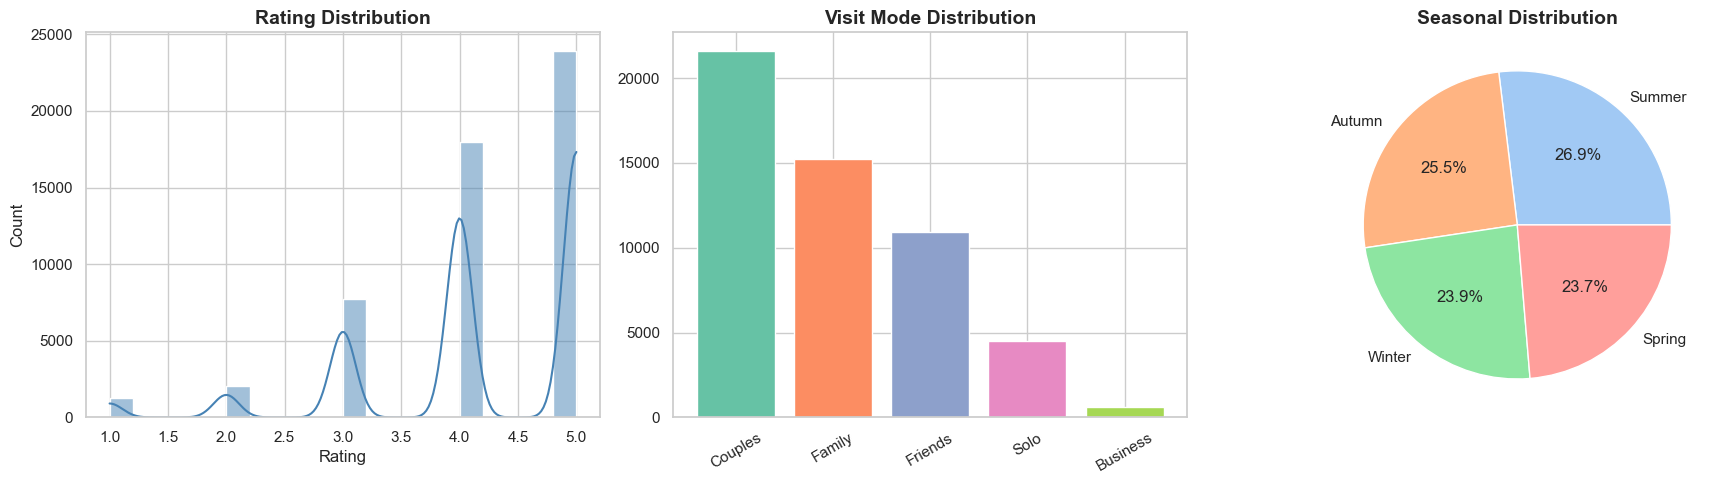

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Rating distribution
sns.histplot(df['Rating'], bins=20, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Rating Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rating')

# Visit mode distribution
vm_counts = df['VisitMode'].value_counts()
axes[1].bar(vm_counts.index, vm_counts.values, color=sns.color_palette('Set2'))
axes[1].set_title('Visit Mode Distribution', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=30)

# Season distribution
season_counts = df['Season'].value_counts()
axes[2].pie(season_counts.values, labels=season_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette('pastel'))
axes[2].set_title('Seasonal Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/plots/eda_overview.png', dpi=150, bbox_inches='tight')
plt.show()

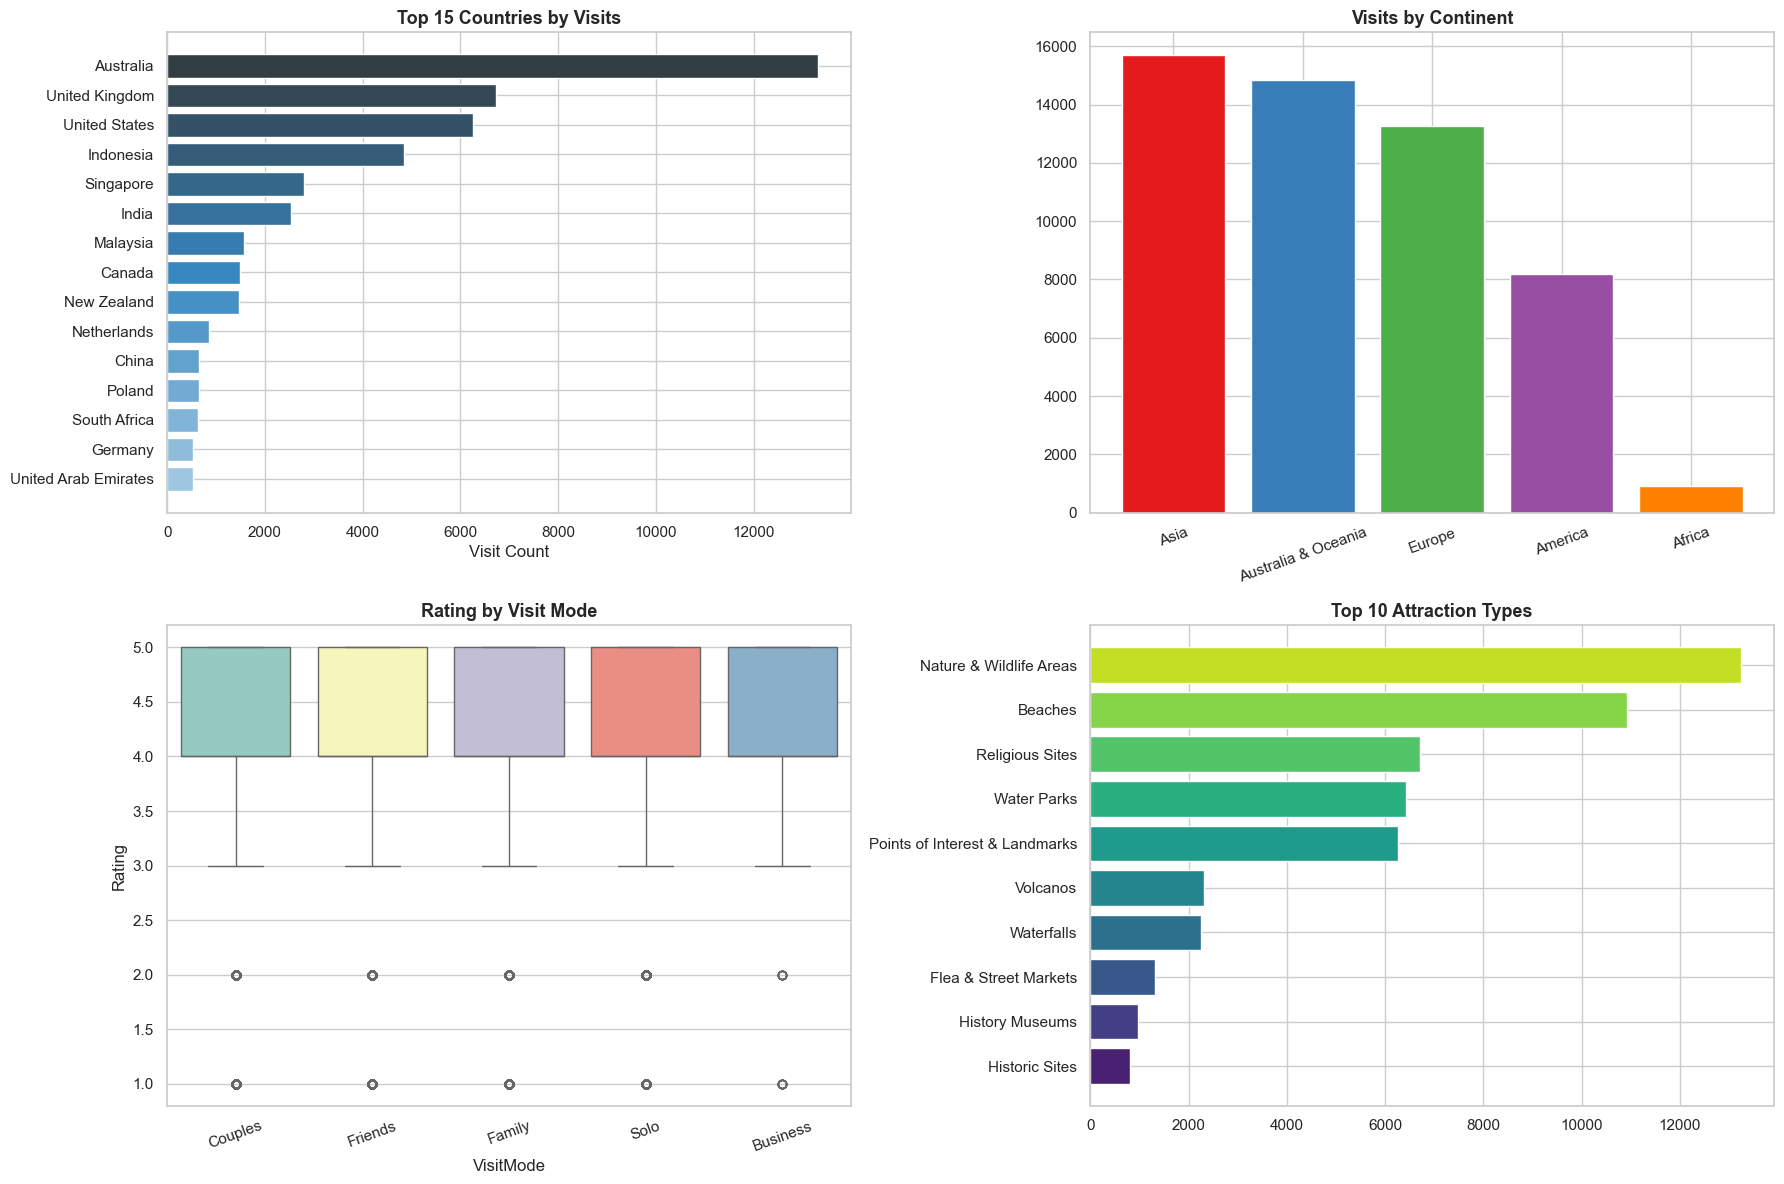

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Top 15 countries by visits
top_countries = df['CountryName'].value_counts().head(15)
axes[0, 0].barh(top_countries.index[::-1], top_countries.values[::-1],
                color=sns.color_palette('Blues_d', 15))
axes[0, 0].set_title('Top 15 Countries by Visits', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Visit Count')

# Visits by Continent
cont_counts = df['ContinentName'].value_counts()
axes[0, 1].bar(cont_counts.index, cont_counts.values,
               color=sns.color_palette('Set1', len(cont_counts)))
axes[0, 1].set_title('Visits by Continent', fontsize=13, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=20)

# VisitMode vs Rating (boxplot)
sns.boxplot(x='VisitMode', y='Rating', data=df, ax=axes[1, 0], palette='Set3')
axes[1, 0].set_title('Rating by Visit Mode', fontsize=13, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=20)

# Top attraction types
top_types = df['AttractionType'].value_counts().head(10)
axes[1, 1].barh(top_types.index[::-1], top_types.values[::-1],
                color=sns.color_palette('viridis', 10))
axes[1, 1].set_title('Top 10 Attraction Types', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/plots/eda_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

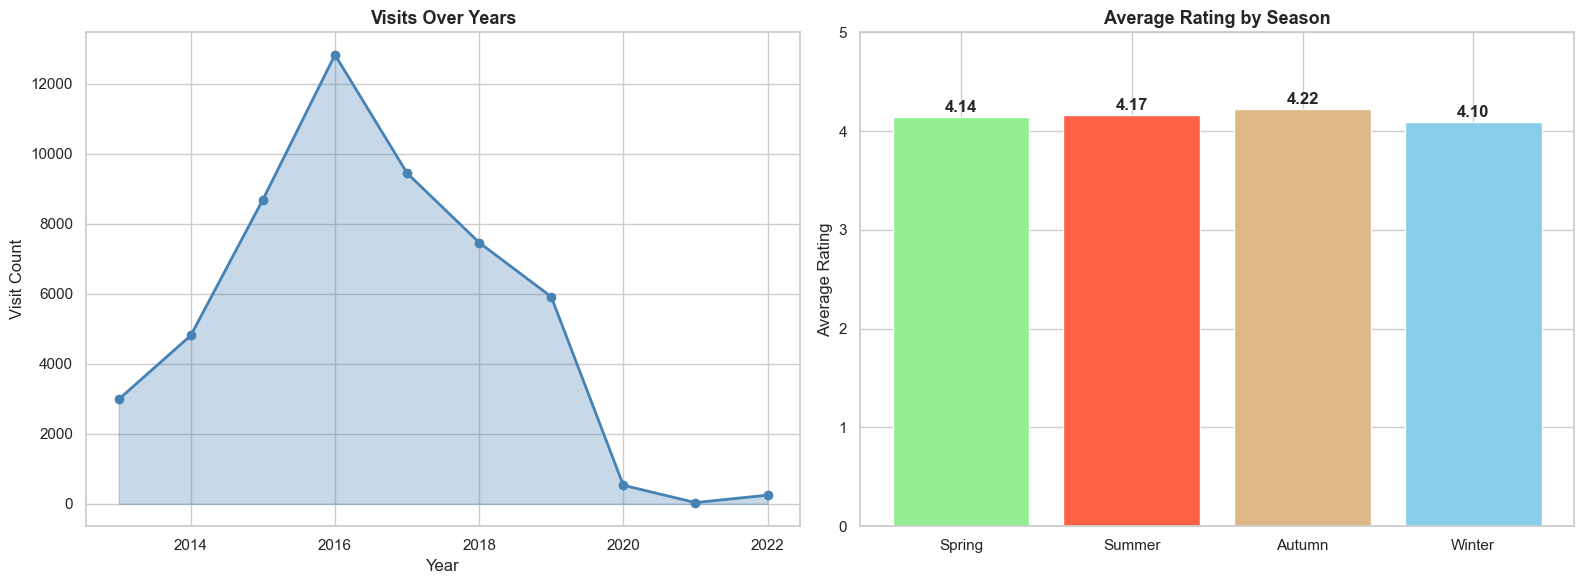

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Visits over years
year_counts = df['VisitYear'].value_counts().sort_index()
axes[0].plot(year_counts.index, year_counts.values, marker='o', color='steelblue', linewidth=2)
axes[0].fill_between(year_counts.index, year_counts.values, alpha=0.3, color='steelblue')
axes[0].set_title('Visits Over Years', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Visit Count')

# Seasonal ratings
season_ratings = df.groupby('Season')['Rating'].mean().reindex(['Spring', 'Summer', 'Autumn', 'Winter'])
axes[1].bar(season_ratings.index, season_ratings.values,
            color=['#90EE90', '#FF6347', '#DEB887', '#87CEEB'])
axes[1].set_ylim([0, 5])
axes[1].set_title('Average Rating by Season', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Average Rating')
for i, (s, v) in enumerate(season_ratings.items()):
    axes[1].text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/plots/eda_temporal.png', dpi=150, bbox_inches='tight')
plt.show()

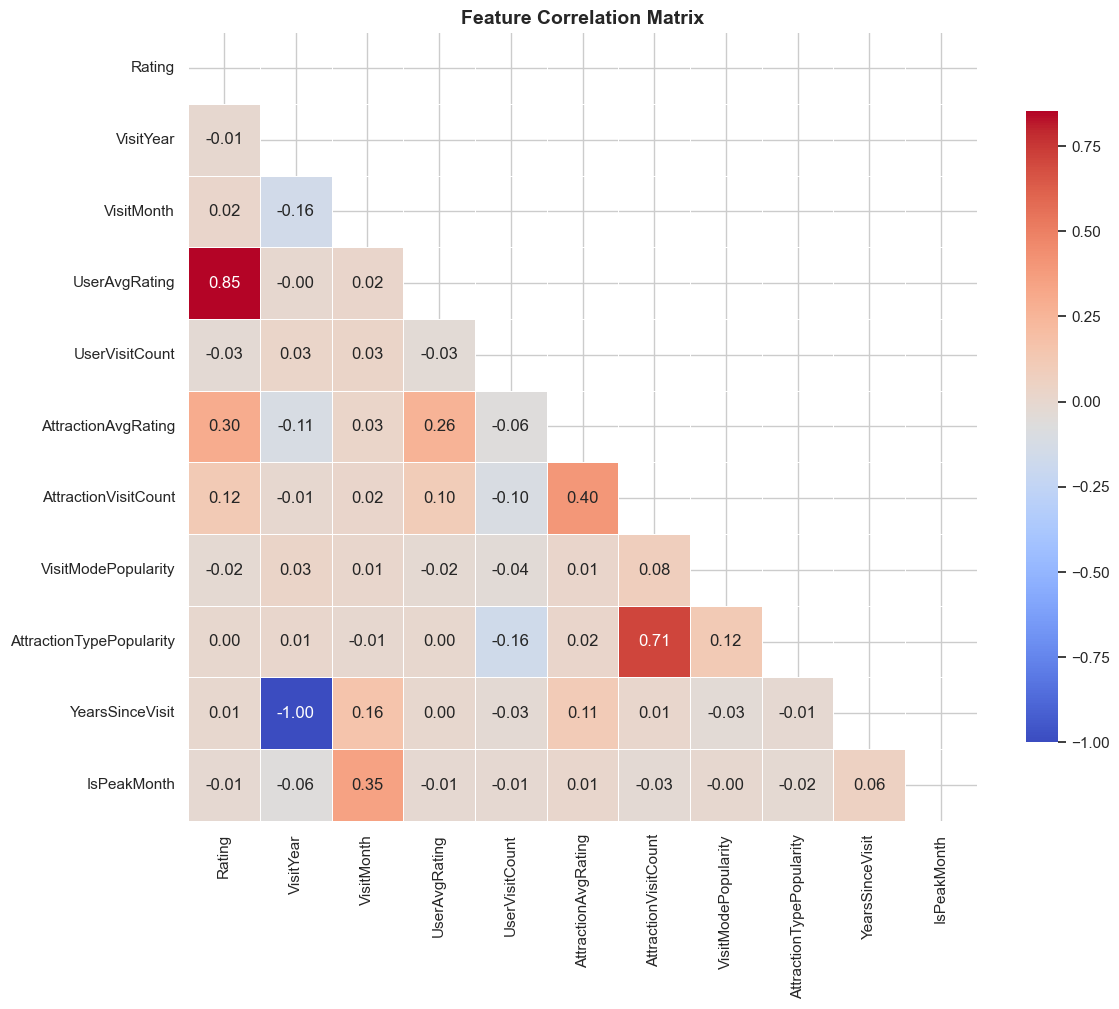

In [60]:
# Correlation heatmap for numerical features
num_cols = ['Rating', 'VisitYear', 'VisitMonth', 'UserAvgRating', 'UserVisitCount',
            'AttractionAvgRating', 'AttractionVisitCount', 'VisitModePopularity',
            'AttractionTypePopularity', 'YearsSinceVisit', 'IsPeakMonth']
num_cols = [c for c in num_cols if c in df.columns]

corr = df[num_cols].corr()
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/plots/eda_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

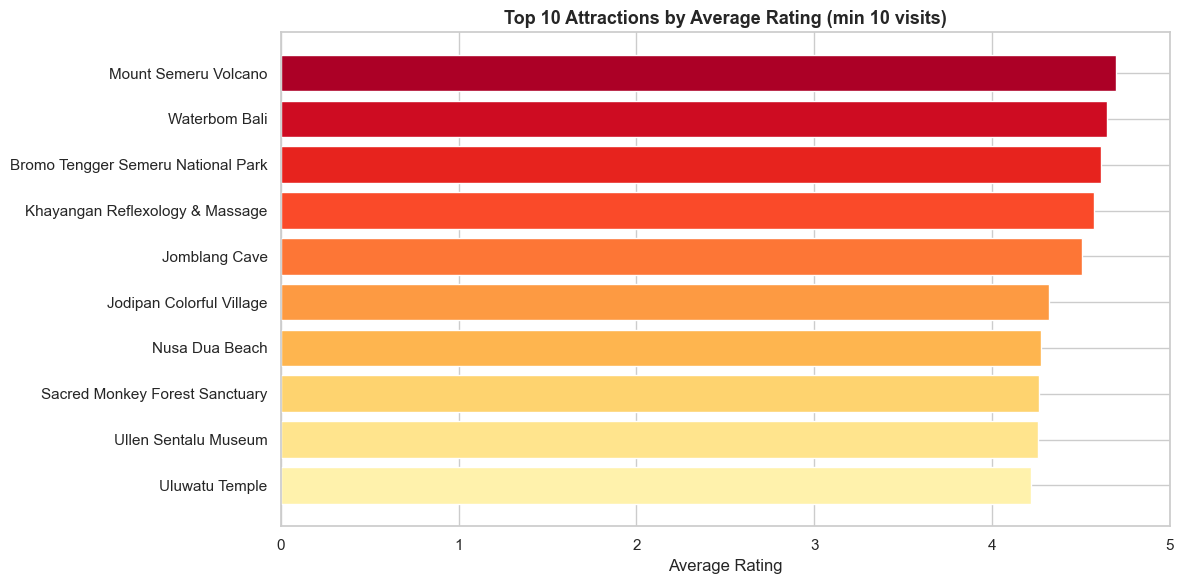

In [61]:
# Top 10 attractions by average rating (min 10 visits)
top_attr = (
    df.groupby('Attraction')['Rating']
    .agg(['mean', 'count'])
    .query('count >= 10')
    .sort_values('mean', ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
plt.barh(top_attr.index[::-1], top_attr['mean'].values[::-1],
         color=sns.color_palette('YlOrRd', 10))
plt.xlabel('Average Rating')
plt.title('Top 10 Attractions by Average Rating (min 10 visits)', fontsize=13, fontweight='bold')
plt.xlim([0, 5])
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/plots/eda_top_attractions.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Preprocessing for Machine Learning

In [62]:
df_ml = df.copy()

# ── 8.1 Fill remaining missing values
num_cols_ml = df_ml.select_dtypes(include=[np.number]).columns
for col in num_cols_ml:
    df_ml[col].fillna(df_ml[col].median(), inplace=True)

cat_cols_ml = df_ml.select_dtypes(include='object').columns
for col in cat_cols_ml:
    df_ml[col].fillna(df_ml[col].mode()[0] if len(df_ml[col].mode()) > 0 else 'Unknown', inplace=True)

# ── 8.2 Label Encoding
label_encoders = {}
categorical_features = [
    'VisitMode', 'ContinentName', 'RegionName', 'CountryName',
    'AttractionType', 'Season', 'UserCityName', 'AttractionCityName', 'ContinentMode'
]
categorical_features = [c for c in categorical_features if c in df_ml.columns]

for col in categorical_features:
    le = LabelEncoder()
    df_ml[f'{col}_Encoded'] = le.fit_transform(df_ml[col].astype(str))
    label_encoders[col] = le
    print(f'  ✓ Encoded {col}: {len(le.classes_)} classes')

# ── 8.3 Save label encoders
encoder_path = os.path.join(OUTPUT_DIR, 'label_encoders.pkl')
with open(encoder_path, 'wb') as f:
    pickle.dump(label_encoders, f)
print(f'\n✅ Label encoders saved → {encoder_path}')

  ✓ Encoded VisitMode: 5 classes
  ✓ Encoded ContinentName: 5 classes
  ✓ Encoded RegionName: 1 classes
  ✓ Encoded CountryName: 153 classes
  ✓ Encoded AttractionType: 17 classes
  ✓ Encoded Season: 4 classes
  ✓ Encoded UserCityName: 1 classes
  ✓ Encoded AttractionCityName: 3 classes
  ✓ Encoded ContinentMode: 25 classes

✅ Label encoders saved → C:\Users\rohit\Desktop\labmentix\label_encoders.pkl


## 9. REGRESSION MODEL — Predicting Attraction Ratings

In [63]:
# ── 9.1 Feature selection for regression
REG_FEATURES = [
    'VisitYear', 'VisitMonth', 'UserVisitCount', 'UserAvgRating', 'UserRatingStd',
    'AttractionVisitCount', 'AttractionAvgRating', 'AttractionRatingStd',
    'VisitModePopularity', 'AttractionTypePopularity', 'YearsSinceVisit', 'IsPeakMonth',
    'ContinentName_Encoded', 'RegionName_Encoded', 'CountryName_Encoded',
    'AttractionType_Encoded', 'Season_Encoded', 'UserCityName_Encoded',
    'AttractionCityName_Encoded'
]
REG_FEATURES = [c for c in REG_FEATURES if c in df_ml.columns]

X_reg = df_ml[REG_FEATURES].copy().fillna(0)
y_reg = df_ml['Rating'].copy()

print(f'Regression features ({len(REG_FEATURES)}):')
for i, f in enumerate(REG_FEATURES, 1): print(f'  {i}. {f}')
print(f'\nTarget (Rating): min={y_reg.min()}, max={y_reg.max()}, mean={y_reg.mean():.2f}')

Regression features (19):
  1. VisitYear
  2. VisitMonth
  3. UserVisitCount
  4. UserAvgRating
  5. UserRatingStd
  6. AttractionVisitCount
  7. AttractionAvgRating
  8. AttractionRatingStd
  9. VisitModePopularity
  10. AttractionTypePopularity
  11. YearsSinceVisit
  12. IsPeakMonth
  13. ContinentName_Encoded
  14. RegionName_Encoded
  15. CountryName_Encoded
  16. AttractionType_Encoded
  17. Season_Encoded
  18. UserCityName_Encoded
  19. AttractionCityName_Encoded

Target (Rating): min=1, max=5, mean=4.16


In [64]:
# ── 9.2 Train/Test split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# ── 9.3 Scaler for linear models
reg_scaler = RobustScaler()
X_reg_train_scaled = reg_scaler.fit_transform(X_reg_train)
X_reg_test_scaled  = reg_scaler.transform(X_reg_test)

# Save regression scaler
scaler_path = os.path.join(OUTPUT_DIR, 'regression_scaler.pkl')
with open(scaler_path, 'wb') as f:
    pickle.dump(reg_scaler, f)

print(f'Train: {X_reg_train.shape}, Test: {X_reg_test.shape}')

Train: (42344, 19), Test: (10586, 19)


In [65]:
# ── 9.4 Train multiple regression models + cross validation

def eval_regressor(name, model, X_tr, y_tr, X_te, y_te, use_scale=False, scaler=None):
    """Train, cross-validate, test, and report metrics."""
    if use_scale:
        X_tr_in = scaler.transform(X_tr) if scaler else X_tr
        X_te_in = scaler.transform(X_te) if scaler else X_te
    else:
        X_tr_in, X_te_in = X_tr, X_te

    # Cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_r2  = cross_val_score(model, X_tr_in, y_tr, cv=kf, scoring='r2')
    cv_rmse = np.sqrt(-cross_val_score(model, X_tr_in, y_tr, cv=kf, scoring='neg_mean_squared_error'))

    # Final fit and predict
    model.fit(X_tr_in, y_tr)
    preds = model.predict(X_te_in)

    r2   = r2_score(y_te, preds)
    rmse = np.sqrt(mean_squared_error(y_te, preds))
    mae  = mean_absolute_error(y_te, preds)

    print(f'\n{'='*55}')
    print(f'  {name}')
    print(f'  CV R²:  {cv_r2.mean():.4f} ± {cv_r2.std():.4f}')
    print(f'  CV RMSE:{cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}')
    print(f'  Test R²:   {r2:.4f}')
    print(f'  Test RMSE: {rmse:.4f}')
    print(f'  Test MAE:  {mae:.4f}')

    return {'model': model, 'preds': preds,
            'r2': r2, 'rmse': rmse, 'mae': mae,
            'cv_r2_mean': cv_r2.mean(), 'cv_rmse_mean': cv_rmse.mean()}

reg_results = {}

# Linear Regression (with scaling)
reg_results['Linear Regression'] = eval_regressor(
    'Linear Regression', LinearRegression(),
    X_reg_train_scaled, y_reg_train, X_reg_test_scaled, y_reg_test
)

# Ridge
reg_results['Ridge'] = eval_regressor(
    'Ridge Regression', Ridge(alpha=1.0),
    X_reg_train_scaled, y_reg_train, X_reg_test_scaled, y_reg_test
)

# Random Forest Regressor
reg_results['Random Forest'] = eval_regressor(
    'Random Forest Regressor',
    RandomForestRegressor(n_estimators=200, max_depth=12, min_samples_split=5,
                          random_state=42, n_jobs=-1),
    X_reg_train, y_reg_train, X_reg_test, y_reg_test
)

# Gradient Boosting
reg_results['Gradient Boosting'] = eval_regressor(
    'Gradient Boosting Regressor',
    GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.05,
                               subsample=0.8, random_state=42),
    X_reg_train, y_reg_train, X_reg_test, y_reg_test
)


print('\n✅ All regression models trained')


  Linear Regression
  CV R²:  0.7351 ± 0.0039
  CV RMSE:0.4995 ± 0.0068
  Test R²:   0.7377
  Test RMSE: 0.4970
  Test MAE:  0.2908

  Ridge Regression
  CV R²:  0.7351 ± 0.0039
  CV RMSE:0.4995 ± 0.0068
  Test R²:   0.7377
  Test RMSE: 0.4970
  Test MAE:  0.2908

  Random Forest Regressor
  CV R²:  0.7337 ± 0.0058
  CV RMSE:0.5008 ± 0.0092
  Test R²:   0.7413
  Test RMSE: 0.4936
  Test MAE:  0.2459

  Gradient Boosting Regressor
  CV R²:  0.7423 ± 0.0065
  CV RMSE:0.4926 ± 0.0081
  Test R²:   0.7504
  Test RMSE: 0.4849
  Test MAE:  0.2459

✅ All regression models trained


In [66]:
# ── 9.5 Comparison table
reg_summary = pd.DataFrame([
    {'Model': name, 'CV R²': res['cv_r2_mean'], 'CV RMSE': res['cv_rmse_mean'],
     'Test R²': res['r2'], 'Test RMSE': res['rmse'], 'Test MAE': res['mae']}
    for name, res in reg_results.items()
]).sort_values('Test R²', ascending=False).reset_index(drop=True)

print('\n📊 Regression Model Comparison:')
display(reg_summary.style.background_gradient(subset=['Test R²', 'CV R²'], cmap='Greens')
                         .background_gradient(subset=['Test RMSE', 'Test MAE'], cmap='Reds_r')
                         .format({c: '{:.4f}' for c in reg_summary.columns if c != 'Model'}))


📊 Regression Model Comparison:


,Model,CV R²,CV RMSE,Test R²,Test RMSE,Test MAE
0,Gradient Boosting,0.7423,0.4926,0.7504,0.4849,0.2459
1,Random Forest,0.7337,0.5008,0.7413,0.4936,0.2459
2,Ridge,0.7351,0.4995,0.7377,0.4970,0.2908
3,Linear Regression,0.7351,0.4995,0.7377,0.4970,0.2908


🏆 Best Regression Model: Gradient Boosting (Test R² = 0.7504)


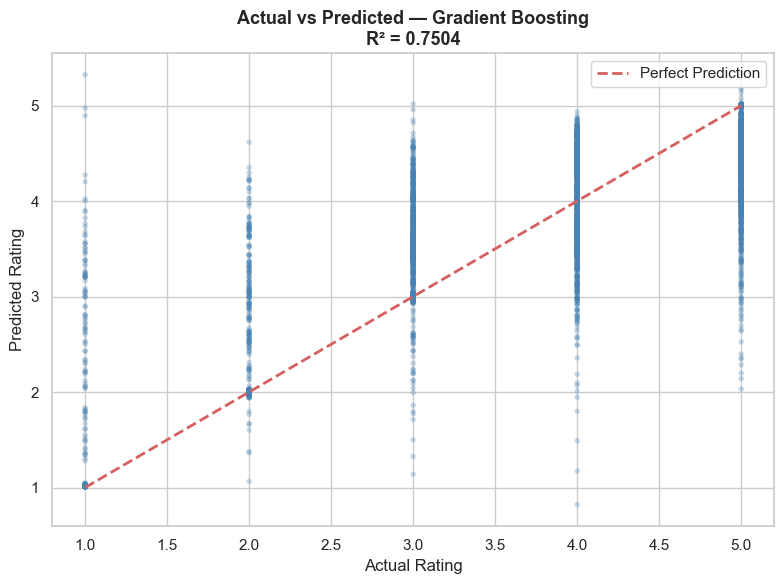

✅ Regression model saved → C:\Users\rohit\Desktop\labmentix\regression_model.pkl


In [67]:
# ── 9.6 Select best regression model and save
best_reg_name = reg_summary.iloc[0]['Model']
best_reg_data = reg_results[best_reg_name]
print(f'🏆 Best Regression Model: {best_reg_name} (Test R² = {best_reg_data["r2"]:.4f})')

# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_reg_test, best_reg_data['preds'], alpha=0.3, s=15, color='steelblue', edgecolors='none')
lim = [y_reg_test.min(), y_reg_test.max()]
plt.plot(lim, lim, 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title(f'Actual vs Predicted — {best_reg_name}\nR² = {best_reg_data["r2"]:.4f}',
          fontsize=13, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/plots/regression_actual_vs_predicted.png', dpi=150, bbox_inches='tight')
plt.show()



# Save regression model package
reg_pkg = {
    'model': best_reg_data['model'],
    'model_name': best_reg_name,
    'feature_columns': REG_FEATURES,
    'scaler': reg_scaler,
    'metrics': {'r2': best_reg_data['r2'], 'rmse': best_reg_data['rmse'], 'mae': best_reg_data['mae']}
}
reg_path = os.path.join(OUTPUT_DIR, 'regression_model.pkl')
with open(reg_path, 'wb') as f:
    pickle.dump(reg_pkg, f)
print(f'✅ Regression model saved → {reg_path}')

## 10. CLASSIFICATION MODEL — Predicting Visit Mode

In [68]:
# ── 10.1 Feature selection for classification
CLF_FEATURES = [
    'VisitYear', 'VisitMonth', 'Rating',
    'UserVisitCount', 'UserAvgRating', 'UserRatingStd',
    'AttractionVisitCount', 'AttractionAvgRating', 'AttractionRatingStd',
    'AttractionTypePopularity', 'YearsSinceVisit', 'IsPeakMonth',
    'ContinentName_Encoded', 'RegionName_Encoded', 'CountryName_Encoded',
    'AttractionType_Encoded', 'Season_Encoded', 'UserCityName_Encoded',
    'AttractionCityName_Encoded'
]
CLF_FEATURES = [c for c in CLF_FEATURES if c in df_ml.columns]

X_clf = df_ml[CLF_FEATURES].copy().fillna(0)
y_clf = df_ml['VisitMode'].copy()

print(f'Classification features ({len(CLF_FEATURES)})')
print(f'Target classes: {sorted(y_clf.unique())}')
print('\nClass distribution:')
print(y_clf.value_counts())

Classification features (19)
Target classes: ['Business', 'Couples', 'Family', 'Friends', 'Solo']

Class distribution:
VisitMode
Couples     21620
Family      15217
Friends     10945
Solo         4525
Business      623
Name: count, dtype: int64


In [69]:
# ── 10.2 Stratified train/test split
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# Scaler for linear classifiers
clf_scaler = RobustScaler()
X_clf_train_scaled = clf_scaler.fit_transform(X_clf_train)
X_clf_test_scaled  = clf_scaler.transform(X_clf_test)

# Save classification scaler
clf_scaler_path = os.path.join(OUTPUT_DIR, 'classification_scaler.pkl')
with open(clf_scaler_path, 'wb') as f:
    pickle.dump(clf_scaler, f)

print(f'Train: {X_clf_train.shape}, Test: {X_clf_test.shape}')

Train: (42344, 19), Test: (10586, 19)


In [70]:
# ── 10.3 Train multiple classifiers + cross validation

def eval_classifier(name, model, X_tr, y_tr, X_te, y_te):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_acc = cross_val_score(model, X_tr, y_tr, cv=skf, scoring='accuracy')
    cv_f1  = cross_val_score(model, X_tr, y_tr, cv=skf, scoring='f1_weighted')

    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)

    acc  = accuracy_score(y_te, preds)
    prec = precision_score(y_te, preds, average='weighted', zero_division=0)
    rec  = recall_score(y_te, preds, average='weighted', zero_division=0)
    f1   = f1_score(y_te, preds, average='weighted', zero_division=0)

    print(f'\n{'='*55}')
    print(f'  {name}')
    print(f'  CV Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}')
    print(f'  CV F1:       {cv_f1.mean():.4f} ± {cv_f1.std():.4f}')
    print(f'  Test Accuracy:  {acc:.4f} ({acc*100:.2f}%)')
    print(f'  Test Precision: {prec:.4f}')
    print(f'  Test Recall:    {rec:.4f}')
    print(f'  Test F1:        {f1:.4f}')

    return {'model': model, 'preds': preds,
            'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1,
            'cv_acc_mean': cv_acc.mean(), 'cv_f1_mean': cv_f1.mean()}

clf_results = {}

# Random Forest Classifier
clf_results['Random Forest'] = eval_classifier(
    'Random Forest Classifier',
    RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5,
                           class_weight='balanced', random_state=42, n_jobs=-1),
    X_clf_train, y_clf_train, X_clf_test, y_clf_test
)

# Gradient Boosting
clf_results['Gradient Boosting'] = eval_classifier(
    'Gradient Boosting Classifier',
    GradientBoostingClassifier(n_estimators=200, max_depth=5, learning_rate=0.05,
                                subsample=0.8, random_state=42),
    X_clf_train, y_clf_train, X_clf_test, y_clf_test
)



print('\n✅ All classifiers trained')


  Random Forest Classifier
  CV Accuracy: 0.4698 ± 0.0027
  CV F1:       0.4685 ± 0.0029
  Test Accuracy:  0.4639 (46.39%)
  Test Precision: 0.4728
  Test Recall:    0.4639
  Test F1:        0.4648

  Gradient Boosting Classifier
  CV Accuracy: 0.5070 ± 0.0054
  CV F1:       0.4588 ± 0.0063
  Test Accuracy:  0.5010 (50.10%)
  Test Precision: 0.5197
  Test Recall:    0.5010
  Test F1:        0.4539

✅ All classifiers trained


In [71]:
# ── 10.4 Comparison table
clf_summary = pd.DataFrame([
    {'Model': name, 'CV Accuracy': res['cv_acc_mean'], 'CV F1': res['cv_f1_mean'],
     'Test Accuracy': res['accuracy'], 'Precision': res['precision'],
     'Recall': res['recall'], 'F1-Score': res['f1']}
    for name, res in clf_results.items()
]).sort_values('Test Accuracy', ascending=False).reset_index(drop=True)

print('\n📊 Classification Model Comparison:')
display(clf_summary.style.background_gradient(subset=['Test Accuracy', 'F1-Score', 'CV Accuracy'], cmap='Greens')
                          .format({c: '{:.4f}' for c in clf_summary.columns if c != 'Model'}))


📊 Classification Model Comparison:


,Model,CV Accuracy,CV F1,Test Accuracy,Precision,Recall,F1-Score
0,Gradient Boosting,0.5070,0.4588,0.5010,0.5197,0.5010,0.4539
1,Random Forest,0.4698,0.4685,0.4639,0.4728,0.4639,0.4648


🏆 Best Classifier: Gradient Boosting (Accuracy = 0.5010)

Classification Report:
              precision    recall  f1-score   support

    Business       0.68      0.12      0.20       125
     Couples       0.49      0.82      0.61      4324
      Family       0.55      0.42      0.48      3043
     Friends       0.44      0.18      0.26      2189
        Solo       0.74      0.07      0.12       905

    accuracy                           0.50     10586
   macro avg       0.58      0.32      0.33     10586
weighted avg       0.52      0.50      0.45     10586



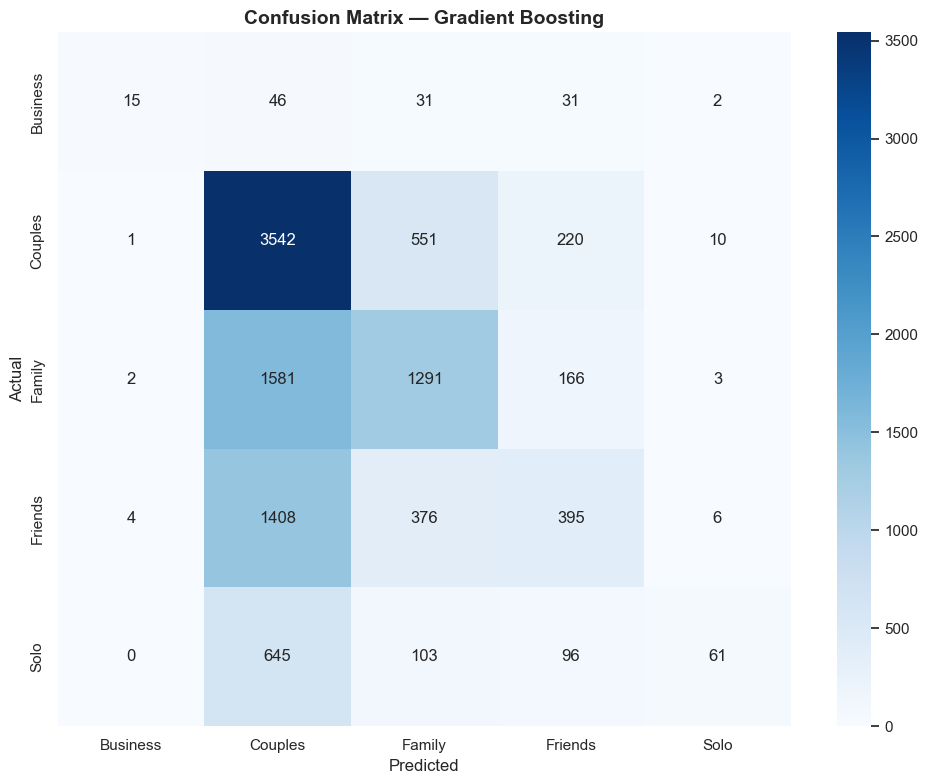

In [72]:
# ── 10.5 Best model → Confusion Matrix + Feature Importance + Save
best_clf_name = clf_summary.iloc[0]['Model']
best_clf_data = clf_results[best_clf_name]
best_clf_model = best_clf_data['model']
print(f'🏆 Best Classifier: {best_clf_name} (Accuracy = {best_clf_data["accuracy"]:.4f})')

# Detailed classification report
print('\nClassification Report:')
print(classification_report(y_clf_test, best_clf_data['preds'], zero_division=0))

# Confusion Matrix
classes = sorted(y_clf.unique())
cm = confusion_matrix(y_clf_test, best_clf_data['preds'], labels=classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title(f'Confusion Matrix — {best_clf_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/plots/classification_confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

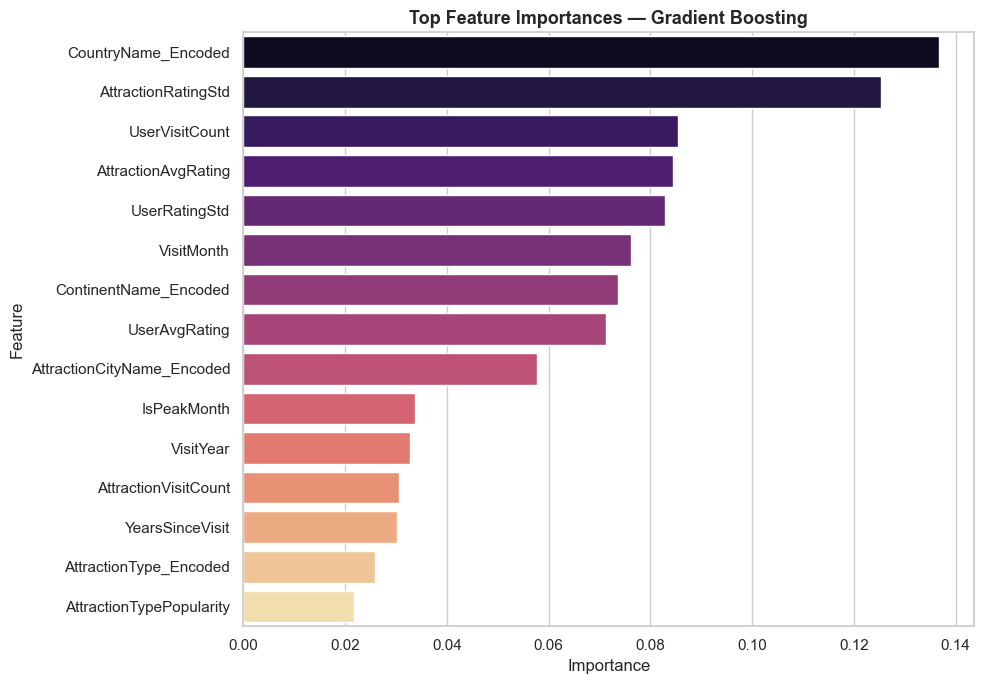

✅ Classification model saved → C:\Users\rohit\Desktop\labmentix\classification_model.pkl


In [73]:
# Feature importance
if hasattr(best_clf_model, 'feature_importances_'):
    fi_clf = pd.DataFrame({'Feature': CLF_FEATURES,
                            'Importance': best_clf_model.feature_importances_})\
               .sort_values('Importance', ascending=False).head(15)
    plt.figure(figsize=(10, 7))
    sns.barplot(x='Importance', y='Feature', data=fi_clf, palette='magma')
    plt.title(f'Top Feature Importances — {best_clf_name}', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/plots/classification_feature_importance.png', dpi=150, bbox_inches='tight')
    plt.show()

# Save classification model
clf_pkg = {
    'model': best_clf_model,
    'model_name': best_clf_name,
    'feature_columns': CLF_FEATURES,
    'classes': classes,
    'scaler': clf_scaler,
    'metrics': {
        'accuracy': best_clf_data['accuracy'],
        'precision': best_clf_data['precision'],
        'recall': best_clf_data['recall'],
        'f1': best_clf_data['f1']
    }
}
clf_path = os.path.join(OUTPUT_DIR, 'classification_model.pkl')
with open(clf_path, 'wb') as f:
    pickle.dump(clf_pkg, f)
print(f'✅ Classification model saved → {clf_path}')

## 11. RECOMMENDATION SYSTEM

In [74]:
# ── 11.1 Collaborative Filtering — User-Item Matrix
print('[STEP 11] Building Recommendation System...')

# Build user-item matrix (limit to users with >1 rating for quality)
active_users = df.groupby('UserId')['AttractionId'].count()
active_users = active_users[active_users > 1].index

df_rec = df[df['UserId'].isin(active_users)]
print(f'Active users for rec system: {len(active_users):,}')

user_item_matrix = df_rec.pivot_table(
    index='UserId', columns='AttractionId', values='Rating', aggfunc='mean'
).fillna(0)

print(f'User-Item Matrix shape: {user_item_matrix.shape}')

[STEP 11] Building Recommendation System...
Active users for rec system: 10,618
User-Item Matrix shape: (10618, 30)


In [75]:
# ── 11.2 Item-Item Similarity (Cosine)
item_similarity = cosine_similarity(user_item_matrix.T)
item_sim_df = pd.DataFrame(
    item_similarity,
    index=user_item_matrix.columns,
    columns=user_item_matrix.columns
)

# ── 11.3 User-User Similarity
user_similarity = cosine_similarity(user_item_matrix)
user_sim_df = pd.DataFrame(
    user_similarity,
    index=user_item_matrix.index,
    columns=user_item_matrix.index
)

print(f'Item similarity matrix: {item_sim_df.shape}')
print(f'User similarity matrix: {user_sim_df.shape}')

Item similarity matrix: (30, 30)
User similarity matrix: (10618, 10618)


In [76]:
# ── 11.4 Recommendation Functions

def recommend_for_user(user_id, n=10):
    """Collaborative filtering: recommend top N attractions for a user."""
    if user_id not in user_item_matrix.index:
        return pd.DataFrame({'AttractionId': [], 'PredictedScore': []})

    # Similar users
    sim_scores = user_sim_df[user_id].drop(user_id).sort_values(ascending=False)
    top_similar = sim_scores.head(20).index

    # Attractions rated by similar users but not by this user
    user_rated = user_item_matrix.loc[user_id]
    user_rated = user_rated[user_rated > 0].index

    similar_ratings = user_item_matrix.loc[top_similar]
    unrated = [c for c in similar_ratings.columns if c not in user_rated]

    # Score = weighted average of similar users' ratings
    weights = sim_scores[top_similar].values
    scores = similar_ratings[unrated].T.dot(weights) / (weights.sum() + 1e-9)
    top_rec = scores.sort_values(ascending=False).head(n)

    result = pd.DataFrame({'AttractionId': top_rec.index, 'PredictedScore': top_rec.values})

    # Merge with attraction names
    result = result.merge(item[['AttractionId', 'Attraction', 'AttractionTypeId']],
                          on='AttractionId', how='left')
    return result


def recommend_similar_attractions(attraction_id, n=10):
    """Content-based: recommend N attractions similar to a given one."""
    if attraction_id not in item_sim_df.index:
        return pd.DataFrame()

    sim_scores = item_sim_df[attraction_id].drop(attraction_id).sort_values(ascending=False)
    top_sim = sim_scores.head(n).reset_index()
    top_sim.columns = ['AttractionId', 'SimilarityScore']
    top_sim = top_sim.merge(item[['AttractionId', 'Attraction']], on='AttractionId', how='left')
    return top_sim

print('✅ Recommendation functions defined')

# Demo
sample_user = user_item_matrix.index[0]
print(f'\nDemo recommendations for user {sample_user}:')
recs = recommend_for_user(sample_user, n=5)
display(recs)

✅ Recommendation functions defined

Demo recommendations for user 10009:


,AttractionId,PredictedScore,Attraction,AttractionTypeId
0,749,0.049914,Tegenungan Waterfall,93
1,1137,0.000000,Kalibiru National Park,61
2,1133,0.000000,Jomblang Cave,19
3,1171,0.000000,Merapi Volcano,91
4,1220,0.000000,Ramayana Ballet At Prambanan,10


In [77]:
# ── 11.5 Evaluate Recommendation System (RMSE on held-out ratings)
print('Evaluating recommendation system...')

# Simple RMSE evaluation: mask some known ratings and predict
np.random.seed(42)
eval_matrix = user_item_matrix.copy()

# Sample 1000 non-zero entries
nonzero_idx = [(r, c) for r in range(eval_matrix.shape[0])
               for c in range(eval_matrix.shape[1])
               if eval_matrix.iloc[r, c] > 0]

sample_n = min(1000, len(nonzero_idx))
sample_idx = [nonzero_idx[i] for i in np.random.choice(len(nonzero_idx), sample_n, replace=False)]

actuals = []
predicted = []

for (r, c) in sample_idx[:sample_n]:
    actual_rating = eval_matrix.iloc[r, c]
    uid = eval_matrix.index[r]
    aid = eval_matrix.columns[c]

    # Predict using item-item: weighted avg of similar items rated by user
    user_ratings_vec = eval_matrix.loc[uid]
    sim_items = item_sim_df.get(aid, None)

    if sim_items is not None:
        rated_mask = user_ratings_vec > 0
        sim_rated  = sim_items[rated_mask]
        if sim_rated.sum() > 0:
            pred = (sim_rated * user_ratings_vec[rated_mask]).sum() / sim_rated.sum()
            actuals.append(actual_rating)
            predicted.append(pred)

if len(actuals) > 0:
    rec_rmse = np.sqrt(mean_squared_error(actuals, predicted))
    rec_mae  = mean_absolute_error(actuals, predicted)
    print(f'Recommendation System RMSE: {rec_rmse:.4f}')
    print(f'Recommendation System MAE:  {rec_mae:.4f}')
else:
    rec_rmse = None
    print('Not enough data to evaluate recommendation RMSE')

Evaluating recommendation system...
Recommendation System RMSE: 0.2952
Recommendation System MAE:  0.1801


In [78]:
# ── 11.6 Save recommendation system
rec_pkg = {
    'user_item_matrix': user_item_matrix,
    'item_similarity': item_sim_df,
    'user_similarity': user_sim_df,
    'item_info': item[['AttractionId', 'Attraction', 'AttractionTypeId']]
}
rec_path = os.path.join(OUTPUT_DIR, 'recommendation_system.pkl')
with open(rec_path, 'wb') as f:
    pickle.dump(rec_pkg, f)
print(f'✅ Recommendation system saved → {rec_path}')

✅ Recommendation system saved → C:\Users\rohit\Desktop\labmentix\recommendation_system.pkl


## 12. Save All Feature Metadata

In [79]:
feature_metadata = {
    'regression_features': REG_FEATURES,
    'classification_features': CLF_FEATURES,
    'categorical_features_encoded': categorical_features,
    'target_regression': 'Rating',
    'target_classification': 'VisitMode',
    'visit_mode_classes': classes,
    'latest_visit_year': latest_year
}
feat_path = os.path.join(OUTPUT_DIR, 'feature_metadata.pkl')
with open(feat_path, 'wb') as f:
    pickle.dump(feature_metadata, f)
print(f'✅ Feature metadata saved → {feat_path}')

✅ Feature metadata saved → C:\Users\rohit\Desktop\labmentix\feature_metadata.pkl


## 13. Final Summary Dashboard

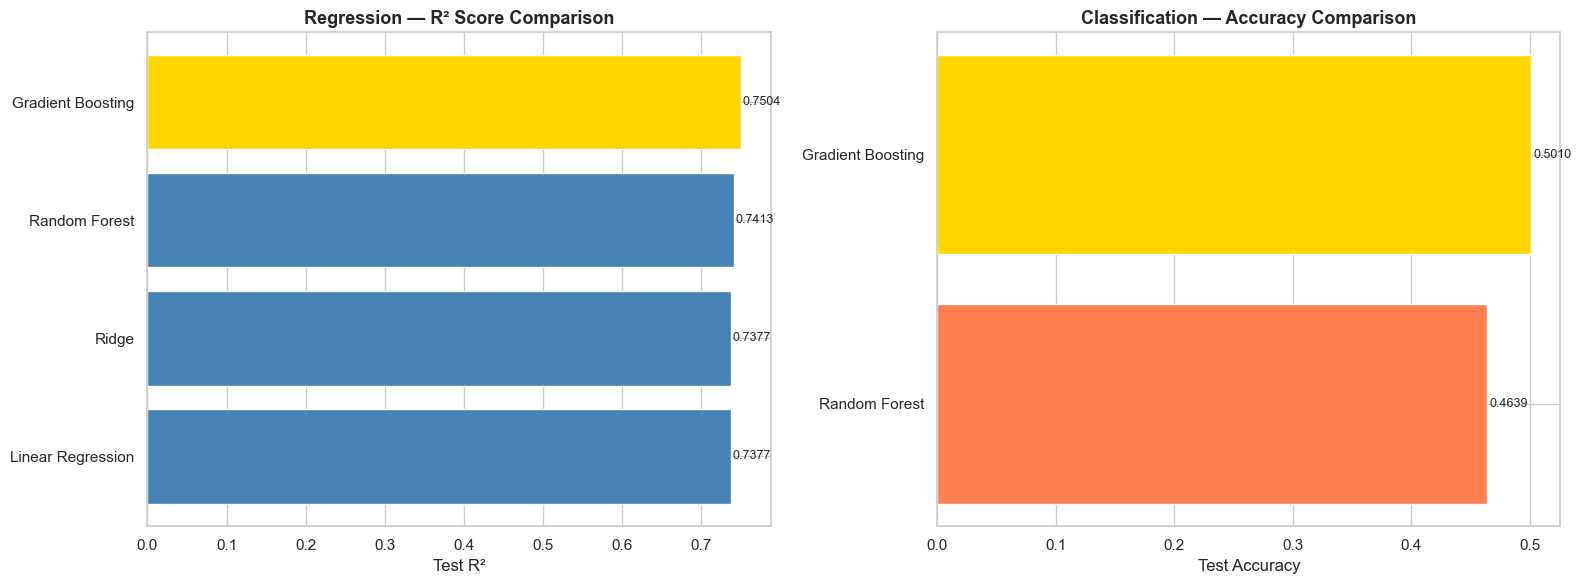

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Regression model comparison
models_r2 = [(k, v['r2']) for k, v in reg_results.items()]
models_r2.sort(key=lambda x: x[1], reverse=True)
names_r = [m[0] for m in models_r2]
scores_r = [m[1] for m in models_r2]
colors_r = ['gold' if n == best_reg_name else 'steelblue' for n in names_r]
axes[0].barh(names_r[::-1], scores_r[::-1], color=colors_r[::-1])
axes[0].set_xlabel('Test R²')
axes[0].set_title('Regression — R² Score Comparison', fontsize=13, fontweight='bold')
for i, s in enumerate(scores_r[::-1]):
    axes[0].text(s + 0.002, i, f'{s:.4f}', va='center', fontsize=9)

# Classification model comparison
models_acc = [(k, v['accuracy']) for k, v in clf_results.items()]
models_acc.sort(key=lambda x: x[1], reverse=True)
names_c = [m[0] for m in models_acc]
scores_c = [m[1] for m in models_acc]
colors_c = ['gold' if n == best_clf_name else 'coral' for n in names_c]
axes[1].barh(names_c[::-1], scores_c[::-1], color=colors_c[::-1])
axes[1].set_xlabel('Test Accuracy')
axes[1].set_title('Classification — Accuracy Comparison', fontsize=13, fontweight='bold')
for i, s in enumerate(scores_c[::-1]):
    axes[1].text(s + 0.002, i, f'{s:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/plots/model_comparison_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

In [81]:
print('=' * 70)
print('🎉  TOURISM ML PIPELINE — COMPLETE SUMMARY')
print('=' * 70)

print(f'\n📦 Dataset: {len(df):,} records | {df["UserId"].nunique():,} users | {df["AttractionId"].nunique():,} attractions')

print(f'\n🔵 REGRESSION (Rating Prediction)')
print(f'   Best Model: {best_reg_name}')
print(f'   Test R²:    {best_reg_data["r2"]:.4f}')
print(f'   Test RMSE:  {best_reg_data["rmse"]:.4f}')
print(f'   Test MAE:   {best_reg_data["mae"]:.4f}')

print(f'\n🟢 CLASSIFICATION (Visit Mode Prediction)')
print(f'   Best Model: {best_clf_name}')
print(f'   Accuracy:   {best_clf_data["accuracy"]:.4f} ({best_clf_data["accuracy"]*100:.2f}%)')
print(f'   F1-Score:   {best_clf_data["f1"]:.4f}')
print(f'   Precision:  {best_clf_data["precision"]:.4f}')
print(f'   Recall:     {best_clf_data["recall"]:.4f}')

print(f'\n🟡 RECOMMENDATION SYSTEM')
print(f'   Type: Collaborative Filtering (User-Item + Item-Item Cosine Similarity)')
print(f'   Matrix: {user_item_matrix.shape[0]:,} users × {user_item_matrix.shape[1]:,} attractions')
if rec_rmse:
    print(f'   RMSE:  {rec_rmse:.4f}')

print(f'\n💾 Saved Files in ./{OUTPUT_DIR}/')
for fname in os.listdir(OUTPUT_DIR):
    if fname.endswith('.pkl'):
        fsize = os.path.getsize(os.path.join(OUTPUT_DIR, fname)) / 1024
        print(f'   {fname} ({fsize:.1f} KB)')

print('\n' + '=' * 70)
print('✅ Pipeline Complete!')
print('=' * 70)

🎉  TOURISM ML PIPELINE — COMPLETE SUMMARY

📦 Dataset: 52,930 records | 33,530 users | 30 attractions

🔵 REGRESSION (Rating Prediction)
   Best Model: Gradient Boosting
   Test R²:    0.7504
   Test RMSE:  0.4849
   Test MAE:   0.2459

🟢 CLASSIFICATION (Visit Mode Prediction)
   Best Model: Gradient Boosting
   Accuracy:   0.5010 (50.10%)
   F1-Score:   0.4539
   Precision:  0.5197
   Recall:     0.5010

🟡 RECOMMENDATION SYSTEM
   Type: Collaborative Filtering (User-Item + Item-Item Cosine Similarity)
   Matrix: 10,618 users × 30 attractions
   RMSE:  0.2952

💾 Saved Files in ./C:\Users\rohit\Desktop\labmentix/
   classification_model.pkl (4488.8 KB)
   classification_scaler.pkl (1.1 KB)
   feature_metadata.pkl (0.8 KB)
   label_encoders.pkl (3.4 KB)
   recommendation_system.pkl (883376.3 KB)
   regression_model.pkl (897.8 KB)
   regression_scaler.pkl (1.1 KB)

✅ Pipeline Complete!
